### CASE STUDY: DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

### Business Problem

### In order to effectively produce quality decisions in the modern credit card industry, knowledge must be gained through effective data analysis and modeling. Through the use of dynamic datadriven decision-making tools and procedures, information can be gathered to successfully evaluate all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud, and collections, respond to customer requests for help with proactive offers and service.


### Import all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Before proceeding with analysis let's import all the datasets as per given information in case study.
Credit_Card_Data = pd.read_excel('Credit Card Data.xlsx')

In [3]:
Customer_Acquisition = pd.read_excel('Credit Card Data.xlsx', 'Customer Acqusition')

In [4]:
Customer_Acquisition.shape

(100, 8)

In [5]:
Customer_Acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
No          100 non-null int64
Customer    100 non-null object
Age         100 non-null float64
City        100 non-null object
Product     100 non-null object
Limit       100 non-null int64
Company     100 non-null object
Segment     100 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [6]:
Spend = pd.read_excel('Credit Card Data.xlsx', 'Spend')

In [7]:
Spend.shape

(1500, 5)

In [8]:
Spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
Sl No:      1500 non-null int64
Customer    1500 non-null object
Month       1500 non-null datetime64[ns]
Type        1500 non-null object
Amount      1500 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [9]:
Repayment = pd.read_excel('Credit Card Data.xlsx', 'Repayment')

In [10]:
Repayment.shape

(1500, 4)

In [11]:
Repayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
SL No:      1500 non-null int64
Customer    1500 non-null object
Month       1500 non-null datetime64[ns]
Amount      1500 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 47.0+ KB


### Problem no. 1: 

### Part a: In case age is less than 18, replace it with mean of age values. 

In [12]:
Customer_Acquisition.loc[Customer_Acquisition['Age'] < 18, 'Age'] = Customer_Acquisition.Age.mean()
Customer_Acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,50.50,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,35.86,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,27.36,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,22.02,BANGALORE,Platimum,10002,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,71.08,CHENNAI,Silver,100000,C19,Salaried_Pvt
96,97,A97,69.88,TRIVANDRUM,Platimum,10000,C20,Govt
97,98,A98,20.95,CALCUTTA,Platimum,10001,C21,Normal Salary
98,99,A99,52.46,CALCUTTA,Platimum,10002,C22,Self Employed


### Part b: In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card) 

In [13]:
# To do analysis we have to first join two tables i.e. Customer Acquisition and Spend table.
Customer_Spend = pd.merge(left = Customer_Acquisition, right = Spend, how = 'inner', on = 'Customer')
Customer_Spend.drop(['Sl No:'], axis = 1, inplace = True)

In [14]:
Customer_Spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.98
1,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,467747.60
2,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,86878.95
3,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,269175.01
4,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,3406.64
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,71.08,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,BIKE,94369.18
1496,97,A97,69.88,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,AUTO,134404.67
1497,98,A98,20.95,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,SHOPPING,446110.92
1498,99,A99,52.46,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,AIR TICKET,108137.20


In [15]:
Customer_Spend['Customer_Spend'] = Customer_Spend.apply(lambda x : 0.50 * x['Limit'] if x['Amount'] > x['Limit'] else x['Amount'], axis=1)

In [16]:
Customer_Spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Customer_Spend
0,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.98,344054.98
1,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,467747.60,467747.60
2,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,86878.95,86878.95
3,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,269175.01,269175.01
4,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,3406.64,3406.64
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,71.08,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,BIKE,94369.18,94369.18
1496,97,A97,69.88,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,AUTO,134404.67,5000.00
1497,98,A98,20.95,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,SHOPPING,446110.92,5000.50
1498,99,A99,52.46,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,AIR TICKET,108137.20,5001.00


### Part c: Incase the repayment amount is more than the limit, replace the repayment with the limit. 

In [17]:
# To do analysis we have to first join two tables i.e. Customer Acquisition and Rapayment table.
Customer_Repayment = pd.merge(left = Customer_Acquisition, right = Repayment, how = 'inner', on = 'Customer')
Customer_Repayment.drop(['SL No:'], axis = 1, inplace = True)

In [18]:
Customer_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,338932.14
1,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,131778.69
2,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,485981.52
3,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,452865.83
4,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,154684.84
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,71.08,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,462073.81
1496,97,A97,69.88,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,269952.60
1497,98,A98,20.95,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,486616.46
1498,99,A99,52.46,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,259682.43


In [19]:
Customer_Repayment['Customer_Repayment'] = Customer_Repayment.apply(lambda x : x['Limit'] if x['Amount'] > x['Limit'] else x['Amount'], axis=1)

In [20]:
Customer_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount,Customer_Repayment
0,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,338932.14,338932.14
1,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,131778.69,131778.69
2,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,485981.52,485981.52
3,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,452865.83,452865.83
4,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,154684.84,154684.84
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,71.08,CHENNAI,Silver,100000,C19,Salaried_Pvt,2004-01-25,462073.81,100000.00
1496,97,A97,69.88,TRIVANDRUM,Platimum,10000,C20,Govt,2004-01-12,269952.60,10000.00
1497,98,A98,20.95,CALCUTTA,Platimum,10001,C21,Normal Salary,2004-01-03,486616.46,10001.00
1498,99,A99,52.46,CALCUTTA,Platimum,10002,C22,Self Employed,2004-01-15,259682.43,10002.00


### Problem No. 2:

### Part a: How many distinct customers exist? 

In [21]:
Customer_Acquisition['Customer'].nunique()

100

### Part b: How many distinct categories exist? 

In [22]:
Credit_Card_Data.nunique()

No          100
Customer    100
Age         100
City          8
Product       3
Limit         8
Company      41
Segment       5
dtype: int64

### Part c: What is the average monthly spend by customers? 

In [23]:
Monthly_Spend = Spend.groupby(Spend.Month.dt.month)[['Amount']].agg('mean')

In [24]:
Monthly_Spend

,Amount
Month,
1,258969.15
2,241763.57
3,265399.24
4,251051.85
5,238554.14
6,250373.90
7,292167.55
8,257768.37
9,241256.02


### Part d: What is the average monthly repayment by customers? 

In [25]:
Monthly_Repayment = Repayment.groupby(Repayment.Month.dt.month)[['Amount']].agg('mean')

In [26]:
Monthly_Repayment

,Amount
Month,
1,250726.23
2,245962.72
3,251989.20
4,231387.99
5,249140.62
6,267582.12
7,251180.75
8,269023.37
9,212215.11


In [27]:
Repayment.groupby(['Customer','Month'])[['Amount']].agg('sum').reset_index().groupby('Customer').mean()

,Amount
Customer,
A1,324704.75
A10,340320.63
A100,409187.83
A11,266174.20
A12,283264.62
...,...
A95,381370.44
A96,462073.81
A97,269952.60


### Part e: If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [28]:
Monthly_Profit = Monthly_Repayment - Monthly_Spend
Monthly_Profit

,Amount
Month,
1,-8242.93
2,4199.15
3,-13410.04
4,-19663.85
5,10586.48
6,17208.22
7,-40986.79
8,11255.01
9,-29040.91


In [29]:
Monthly_Profit['Amount'].apply(lambda x : 0.029 * x if x > 0 else x)

Month
1     -8242.93
2       121.78
3    -13410.04
4    -19663.85
5       307.01
6       499.04
7    -40986.79
8       326.40
9    -29040.91
10     1631.51
11      489.59
12    -1051.67
Name: Amount, dtype: float64

### Part f: What are the top 5 product types? 

In [30]:
Spend['Type'].value_counts()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
CLOTHES          95
JEWELLERY        95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: Type, dtype: int64

### As we can see in above analysis we have top 5 product types as: 'Petro', 'Food', 'Camera', 'Air Ticket' and 'Train Ticket'

### Part g: Which city is having maximum spend? 

In [31]:
Customer_Spend[Customer_Spend.Amount == Customer_Spend.Amount.max()]

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Customer_Spend
168,11,A11,37.46,COCHIN,Gold,500000,C11,Normal Salary,2005-05-31,PETRO,499980.65,499980.65


### As we can see from above observation that 'COCHIN' is having maximum spend.

### Part h: Which age group is spending more money? 

In [32]:
# We will create the bins to analyse the age group for maximum spend.
Customer_Spend['age_group'] = pd.cut(Customer_Spend['Age'], 6)
Customer_Spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Customer_Spend,age_group
0,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-12,JEWELLERY,344054.98,344054.98,"(28.249, 38.491]"
1,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-03,PETRO,467747.60,467747.60,"(28.249, 38.491]"
2,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-15,CLOTHES,86878.95,86878.95,"(28.249, 38.491]"
3,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2004-01-25,FOOD,269175.01,269175.01,"(28.249, 38.491]"
4,1,A1,34.01,BANGALORE,Gold,500000,C1,Self Employed,2005-01-17,CAMERA,3406.64,3406.64,"(28.249, 38.491]"


In [33]:
Customer_Spend['age_group'].value_counts()

(28.249, 38.491]    654
(38.491, 48.734]    208
(48.734, 58.977]    187
(17.944, 28.249]    180
(58.977, 69.22]     137
(69.22, 79.463]     134
Name: age_group, dtype: int64

### We can see from above output that age group lying between 28 to 38 is the age group spending more money

### Part i: Who are the top 10 customers in terms of repayment?

In [34]:
Customer_Repayment.sort_values('Amount', axis = 0, ascending = False).reset_index().drop(['index', 'No','Customer_Repayment'], axis = 1).head(10)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
0,A38,56.36,CHENNAI,Platimum,500000,C20,Self Employed,2005-11-20,499405.49
1,A56,19.76,CHENNAI,Platimum,500000,C18,Normal Salary,2005-02-01,499284.51
2,A3,35.86,COCHIN,Platimum,10000,C3,Salaried_Pvt,2005-02-03,498554.43
3,A42,59.04,BOMBAY,Gold,500000,C24,Normal Salary,2005-05-27,498112.12
4,A33,37.46,BOMBAY,Platimum,10002,C15,Salaried_MNC,2006-07-03,496965.29
5,A13,37.46,BANGALORE,Gold,500000,C13,Salaried_MNC,2005-02-16,496905.46
6,A47,22.72,CHENNAI,Platimum,10000,C9,Normal Salary,2006-10-03,495872.03
7,A43,37.46,BANGALORE,Gold,500000,C25,Self Employed,2004-01-03,495074.58
8,A51,70.49,BOMBAY,Platimum,100001,C13,Govt,2006-03-31,494578.45
9,A11,37.46,COCHIN,Gold,500000,C11,Normal Salary,2006-03-28,493830.39


### Problem No. 3:

### Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [35]:
City_Wise_Spend = Customer_Spend.groupby(['City', 'Type', Customer_Spend['Month'].dt.year])[['Amount']].agg('mean').reset_index()
City_Wise_Spend

,City,Type,Month,Amount
0,BANGALORE,AIR TICKET,2004,201125.53
1,BANGALORE,AIR TICKET,2005,205223.32
2,BANGALORE,AIR TICKET,2006,291435.23
3,BANGALORE,AUTO,2005,476025.12
4,BANGALORE,AUTO,2006,318331.31
...,...,...,...,...
316,TRIVANDRUM,SHOPPING,2005,149862.32
317,TRIVANDRUM,SHOPPING,2006,125763.28
318,TRIVANDRUM,TRAIN TICKET,2004,79044.80
319,TRIVANDRUM,TRAIN TICKET,2005,378220.20


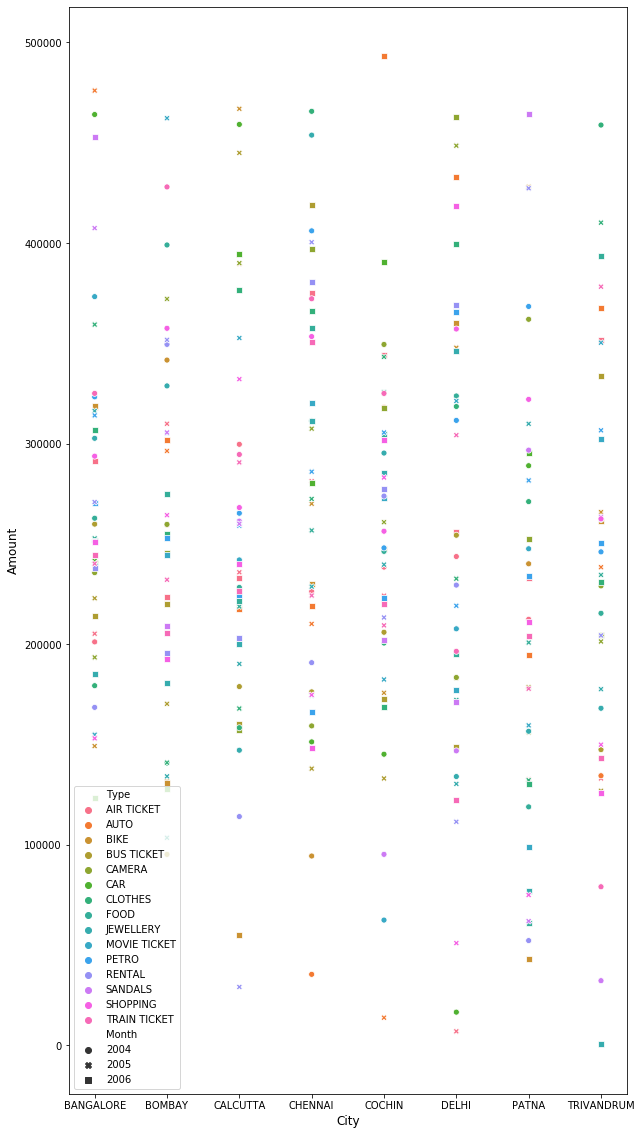

In [36]:
fig, ax = plt.subplots(figsize=(10,20))
sns.scatterplot(x='City', y='Amount', style = 'Month', hue='Type', data=City_Wise_Spend) 
plt.xlabel('City', fontsize = 12)
plt.ylabel('Amount', fontsize = 12)
plt.show()

### Problem No. 4:

### Create graphs for

### Part a: Monthly comparison of total spends, city wise 

In [37]:
#pd.options.display.float_format = '{:.6f}'.format
City_Wise_Spend_Monthly = Customer_Spend.groupby(['City', Customer_Spend['Month'].dt.month])[['Amount']].agg('sum').reset_index()
City_Wise_Spend_Monthly

,City,Month,Amount
0,BANGALORE,1,18237915.19
1,BANGALORE,2,12517283.65
2,BANGALORE,3,13951779.76
3,BANGALORE,4,6409864.41
4,BANGALORE,5,11049129.64
...,...,...,...
91,TRIVANDRUM,8,595665.06
92,TRIVANDRUM,9,605917.74
93,TRIVANDRUM,10,90578.41
94,TRIVANDRUM,11,1029230.82


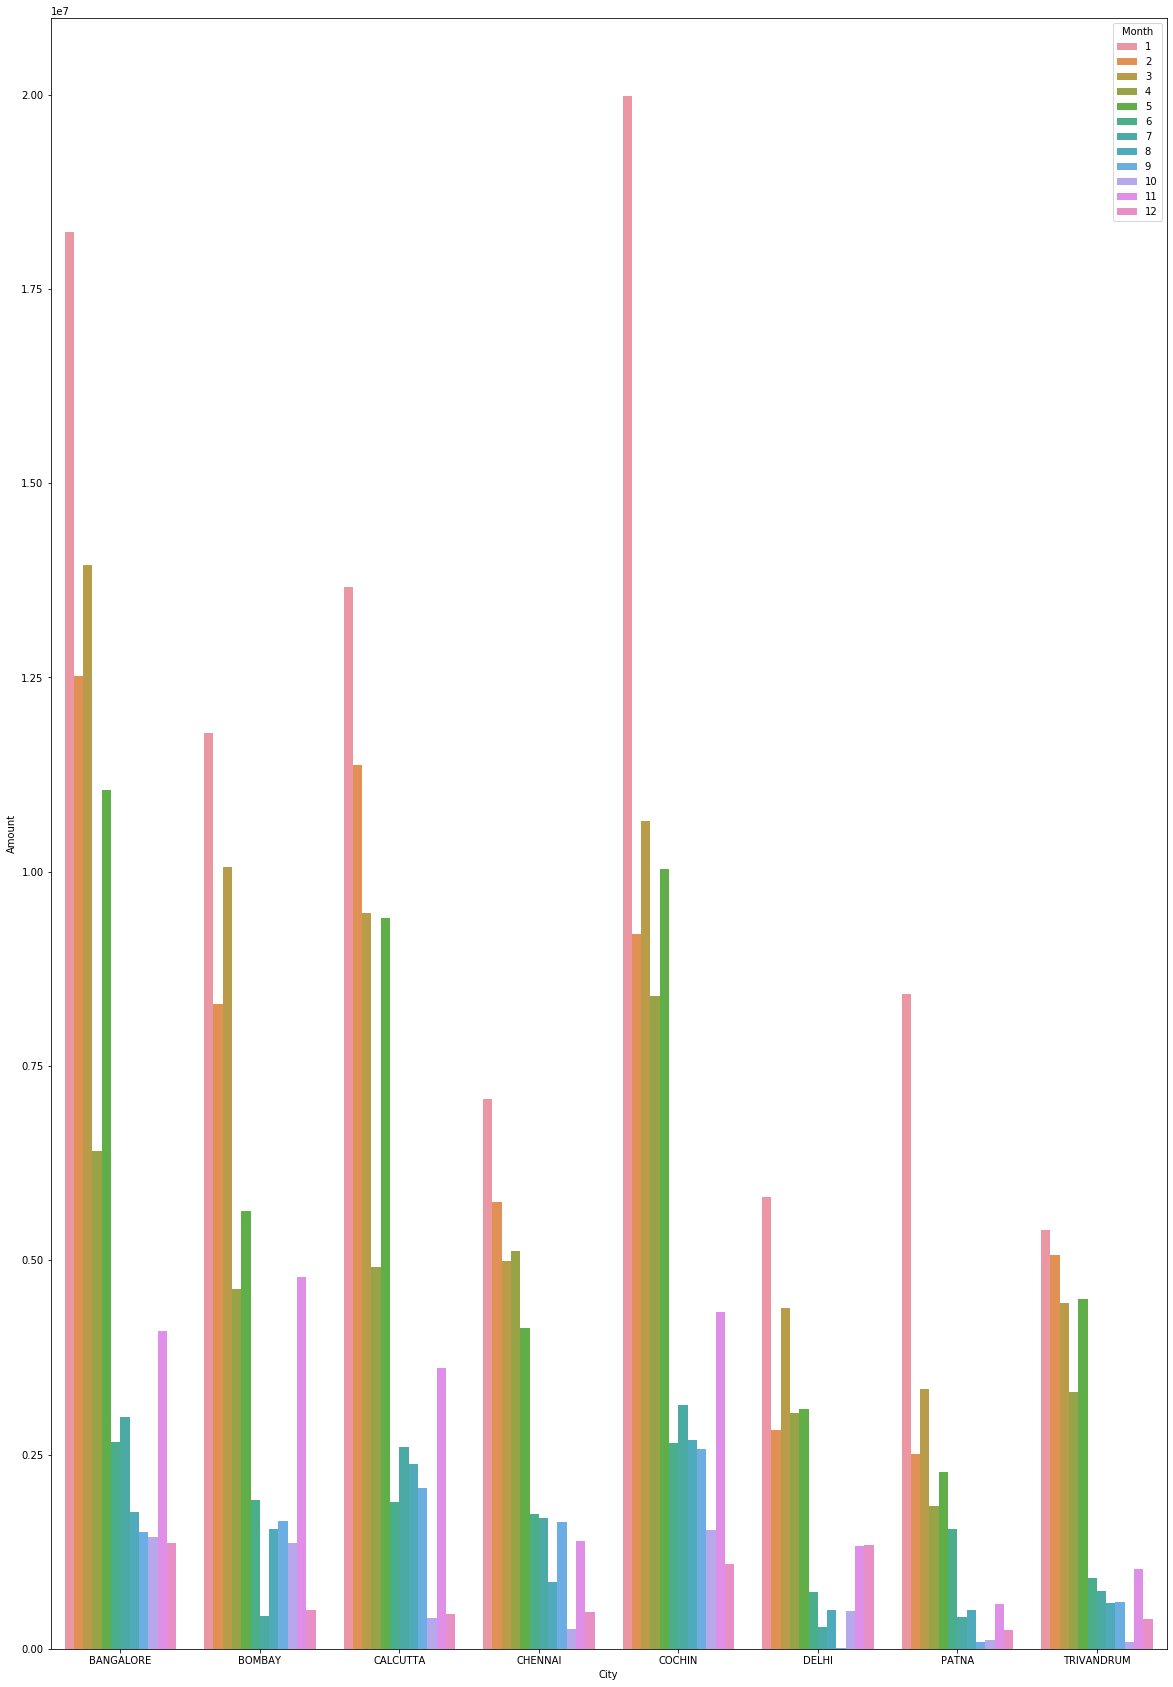

In [38]:
fig, ax = plt.subplots(figsize=(20,30))
sns.barplot(x='City', y='Amount', hue = 'Month', data=City_Wise_Spend_Monthly) 
plt.show()

### Part b: Comparison of yearly spend on air tickets 

In [39]:
Yearly_Spend_Airtkt = City_Wise_Spend[City_Wise_Spend.Type == 'AIR TICKET']
Yearly_Spend_Airtkt

,City,Type,Month,Amount
0,BANGALORE,AIR TICKET,2004,201125.53
1,BANGALORE,AIR TICKET,2005,205223.32
2,BANGALORE,AIR TICKET,2006,291435.23
43,BOMBAY,AIR TICKET,2004,259472.82
44,BOMBAY,AIR TICKET,2005,309863.37
45,BOMBAY,AIR TICKET,2006,223403.48
83,CALCUTTA,AIR TICKET,2004,299653.28
84,CALCUTTA,AIR TICKET,2005,235840.27
85,CALCUTTA,AIR TICKET,2006,233192.31
124,CHENNAI,AIR TICKET,2004,226216.94


In [40]:
Yearly_Spend_Airtkt.Amount.min()

6947.743338916457

In [41]:
Yearly_Spend_Airtkt.Amount.max()

374904.1756041059

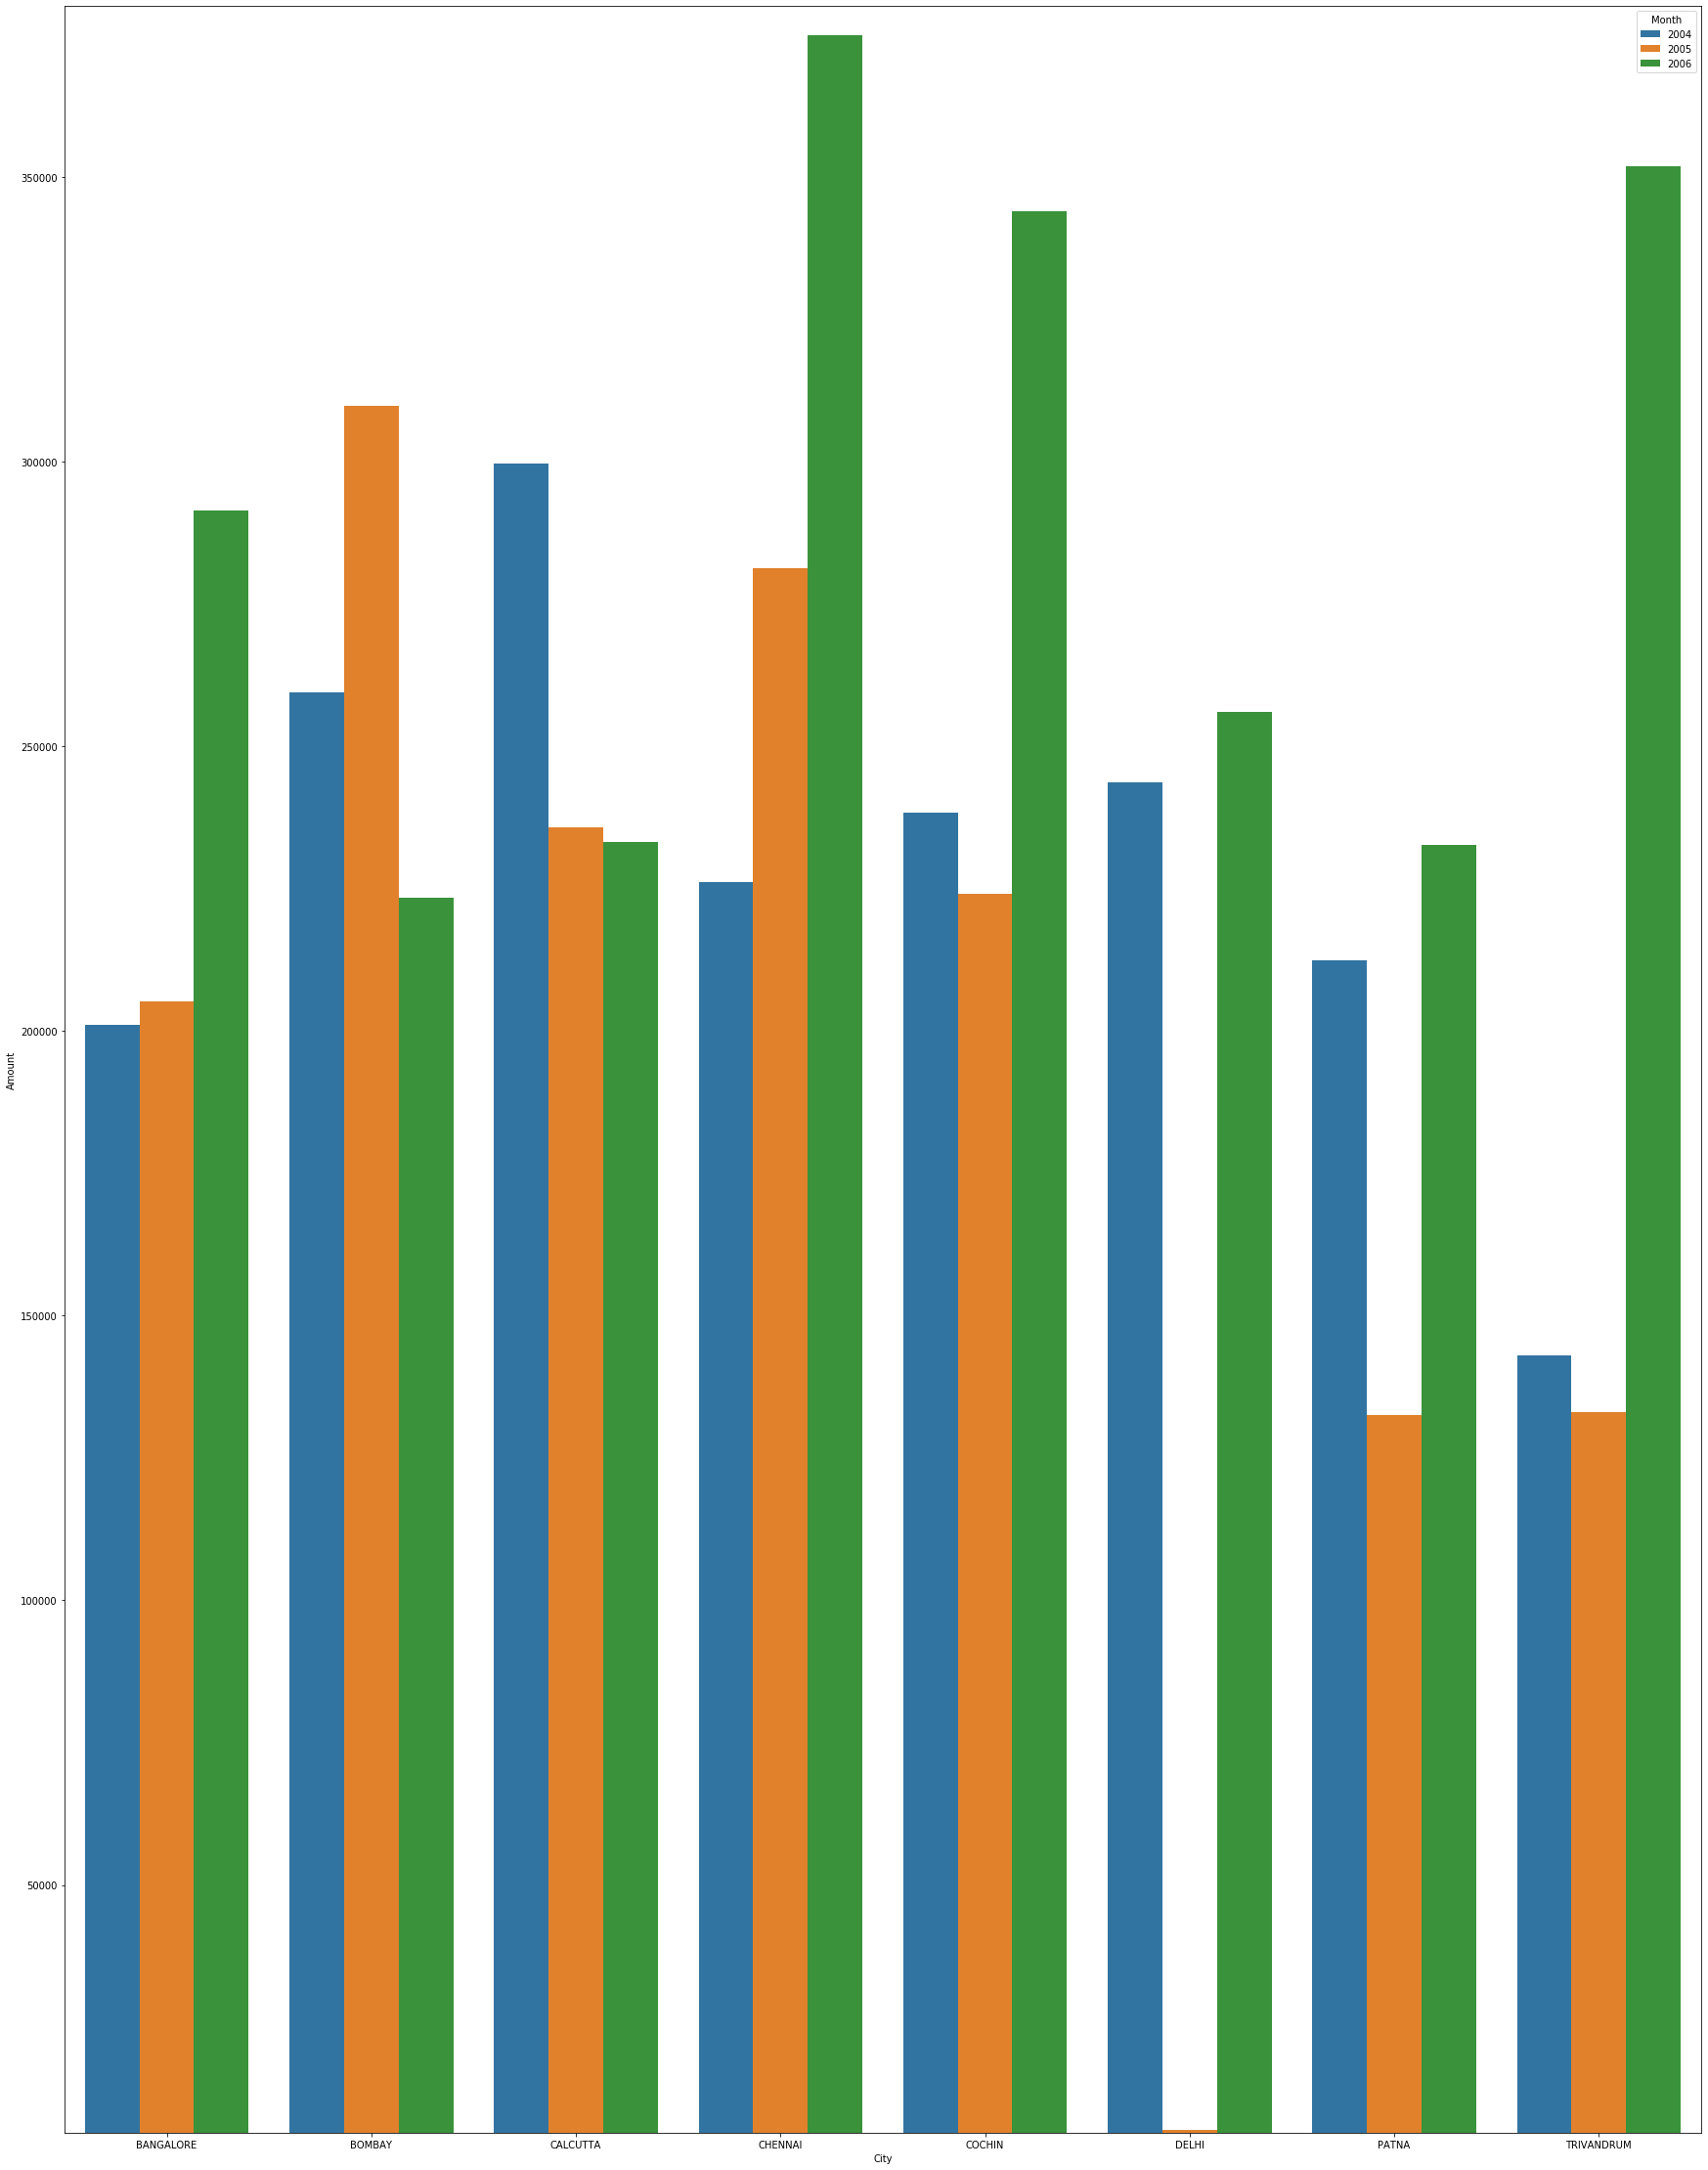

In [42]:
fig, ax = plt.subplots(figsize=(30,40))
ax = sns.barplot(x='City', y='Amount', hue='Month', data=Yearly_Spend_Airtkt)
#sns.barplot(x='City', y='Amount', hue='Month', data=Yearly_Spend_Airtkt) 
#plt.legend(fontsize='x-large', title_fontsize='40')
#ax.set_ylim(Yearly_Spend_Airtkt['Amount'].min, Yearly_Spend_Airtkt['Amount'].max)
#print (ax.axes)
#axes = ax.axes
#axes[0,0].set_ylim(Yearly_Spend_Airtkt['Amount'].min, Yearly_Spend_Airtkt['Amount'].max)
ax.set(ylim=(6500, 380000))
plt.rcParams["axes.labelsize"] = 35
plt.show()

### Part c: Comparison of monthly spend for each product (look for any seasonality     that exists in terms of spend)


In [43]:
Spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,344054.98
1,2,A1,2004-01-03,PETRO,467747.60
2,3,A1,2004-01-15,CLOTHES,86878.95
3,4,A1,2004-01-25,FOOD,269175.01
4,5,A1,2005-01-17,CAMERA,3406.64
...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,418316.71
1496,1497,A68,2006-03-25,BUS TICKET,222182.01
1497,1498,A69,2006-03-31,BUS TICKET,100049.08
1498,1499,A70,2006-03-23,BUS TICKET,316308.25


In [44]:
temp1 = Spend.groupby([Spend['Month'].dt.month, 'Type']).agg({'Amount':'mean'})
temp1
temp1.stack()
spend_monthly = temp1.unstack(level = 1)

In [45]:
spend_monthly

Amount                                                               \
Type  AIR TICKET      AUTO      BIKE BUS TICKET    CAMERA       CAR   CLOTHES   
Month                                                                           
1      272151.76 162602.73 256653.23  179881.97 262142.24 208618.57 216561.24   
2      226079.39 342805.94 136446.82  246139.33 178431.49 391575.91 249394.37   
3      286005.08 310142.70 283637.43  230159.32 262378.28 276509.35 282186.22   
4      255372.02 396904.01 148895.84  213559.11 259688.66 123053.08 311594.16   
5      265359.44 215058.68 262850.43  202378.88 244133.60 361677.78 234230.23   
6      205072.72       nan       nan  171844.22 296261.57       nan 443929.34   
7      337515.79       nan       nan   17625.49 307763.11       nan       nan   
8      277366.65       nan       nan  216782.15 420989.70       nan       nan   
9      292399.75       nan       nan   48139.84 426167.13 269408.87 218920.08   
10     213797.64       nan       nan  128931.52       nan 183026.81       nan   
11     187761.57 251948.85 267992.78  241369.68 184842.36 459281.33 263468.68   
12      94397.46  18244.13       nan        nan       nan       nan 183721.37   

                                                                      \
Type       FOOD JEWELLERY MOVIE TICKET     PETRO    RENTAL   SANDALS   
Month                                                                  
1     274362.31 274719.35    240183.68 267840.89 276163.85 174737.40   
2     218750.63 260053.60    293304.41 271244.41 247586.66 197753.03   
3     271685.21 156772.08    236676.69 287852.53 254859.35 334536.85   
4     266599.81 242806.97    257364.08 205456.48 305771.84 209022.54   
5     236342.08 179964.76    224414.18 280747.50 203319.31  74661.23   
6     231243.15 322625.84    113653.19 236491.49       nan       nan   
7     383877.20 101116.28          nan 332114.25 241416.86       nan   
8     282609.60       nan    339841.31 249599.81 297616.64 271054.69   
9     261036.94 278895.08    198571.64 224815.60 201284.75 273214.24   
10    233901.30 199723.74    462286.60 264638.31 193666.71       nan   
11    197706.04 434209.47    220140.52 291716.94  50243.69 337868.76   
12    258697.70 459681.33    437937.39  91842.15 239634.33 303804.59   

                              
Type   SHOPPING TRAIN TICKET  
Month                         
1     289260.62    321073.51  
2     228244.29    221103.26  
3     250872.45    203208.21  
4     248515.07    277284.89  
5     264618.01    250901.17  
6     219672.41    415328.22  
7           nan    257388.60  
8     144082.16    226501.20  
9           nan    198526.06  
10    322464.83     62876.45  
11    254431.86    250924.35  
12          nan    108039.59

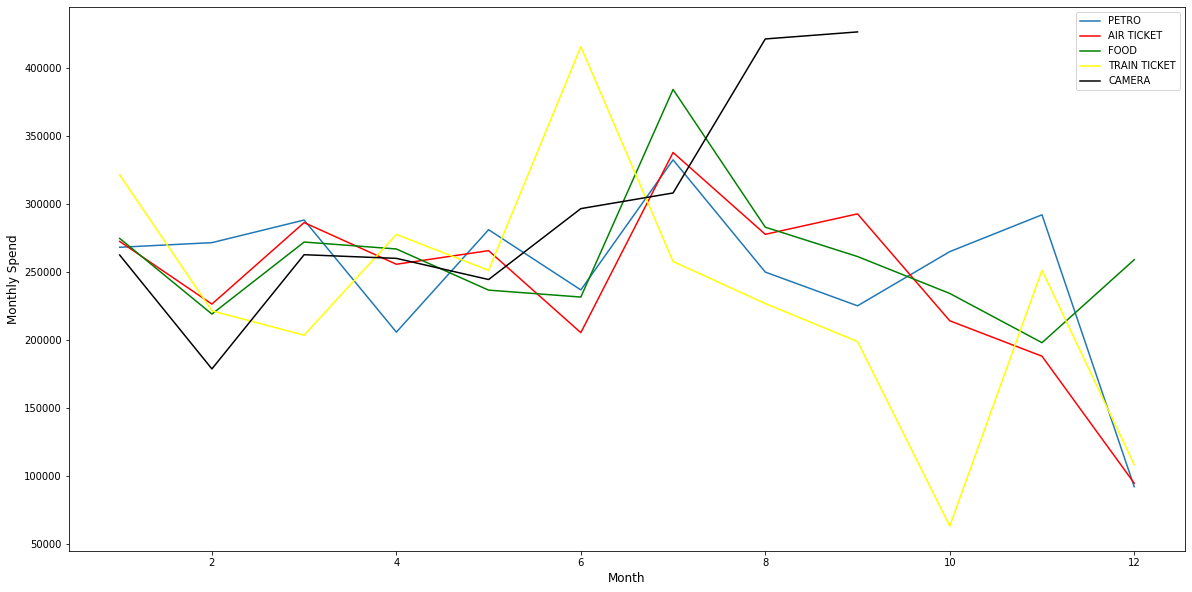

In [46]:
plt.figure(figsize= (20,10))
plt.plot(spend_monthly[('Amount',   'PETRO')], label = 'PETRO')
plt.plot(spend_monthly[('Amount',   'AIR TICKET')], c= 'red', label = 'AIR TICKET')
plt.plot(spend_monthly[('Amount',   'FOOD')], c= 'green', label = 'FOOD')
#plt.plot(spend_monthly[('Amount',   'SHOPPING')], c= 'cyan', label = 'SHOPPING')
plt.plot(spend_monthly[('Amount',   'TRAIN TICKET')], c= 'yellow', label = 'TRAIN TICKET')
plt.plot(spend_monthly[('Amount',   'CAMERA')], c= 'black', label = 'CAMERA')
#plt.plot(spend_monthly[('Amount',   'AUTO')], c= 'magenta', label = 'AUTO')
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Monthly Spend', fontsize = 12)
plt.legend()
plt.show()

In [47]:
### As we can observe from above plot that "Seasonality" can be observed in few product types like 'Petro', 'Food'
### 'Air Ticket', 'Train Ticket', 'Camera', etc. As per the value counts and data points for them we can observe
### the trends of expenditure in different months.

### Problem No. 5:

###  Write user defined PYTHON function to perform the following analysis: 

### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [48]:
def top10():
    """Returns the top 10 customers based on repayments.
   
    Users to specify Gold/Silver/Platinum as product type. Function
    can then aggregate customer repayments over the month or year
    value as specified.
    Dataframe(Customer name and Repayment values) of top 10 customers are then printed.
    """
data_table = pd.read_excel('Book2.xlsx')
data_table['Month'] = pd.to_datetime(data_table['Month'], format="%d/%m/%Y")
data_table['month_value'] = data_table['Month'].dt.month
data_table['year_value'] = data_table['Month'].dt.year
product = input('Enter Product:')
mask = (data_table['Product'] == product)
data_table_product = data_table[mask]
city = input('Enter City:')
mask1 = (data_table['City'] == city)
data_table_city = data_table[mask1]
time = input('time (monthly/yearly):')
    
if(time=='monthly'):
        value = int(input('month value'))
        df_monthly = data_table_product.groupby(by=['month_value', 'Customer',data_table_city['City']]).agg({'Customer_Repayment': 'sum'})
        print(f'Top 10 {product} customers are:-')
        print(df_monthly.loc[(value,)].sort_values(by='Customer_Repayment',ascending=False).head(10))

else:
        value = int(input('year value'))
        df_yearly = data_table_product.groupby(by=['year_value', 'Customer',data_table_city['City']]).agg({'Customer_Repayment': 'sum'})
        print(f'Top 10 {product} customers are:-')
        print(df_yearly.loc[(value,)].sort_values(by='Customer_Repayment',ascending=False).head(10))

Enter Product:Gold
Enter City:BOMBAY
time (monthly/yearly):monthly
month value1
Top 10 Gold customers are:-
                 Customer_Repayment
Customer City                      
A42      BOMBAY          2999181.30
A12      BOMBAY          1607968.93
A17      BOMBAY          1259463.02
A62      BOMBAY           439559.44


In [49]:
# We have created a user defined function considering below factors:
""" First we have taken the specific product type as user input
    and then we have taken the time as user input 
    that too based on the user input as monthly/yearly type"""
# After this we will aggregate the data based on the selection of time period by user i.e. either monthly or yearly.
""" Now since we are using City, Product Type as well as time duration as the factors for 
    determining the top customers so it vary on the number of customers finally appearing 
    as top customers"""

' Now since we are using City, Product Type as well as time duration as the factors for \n    determining the top customers so it vary on the number of customers finally appearing \n    as top customers'